In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename));

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [3]:
my_data_dir = './images'
train_path = my_data_dir + '/train'
test_path = my_data_dir + '/test' 

In [4]:
os.listdir(my_data_dir) 

['.DS_Store', 'test', 'train']

In [5]:
os.listdir(train_path)

['.DS_Store', 'monet_jpg', 'monet_tfrec']

In [6]:
example = train_path+'/monet_jpg/'+os.listdir(train_path+'/monet_jpg')[0]
example

'./images/train/monet_jpg/1f22663e72.jpg'

In [7]:
#para_img = imread('/kaggle/input/gan-getting-started/monet_jpg/f4413e97bd.jpg')
train_img = imread(example)

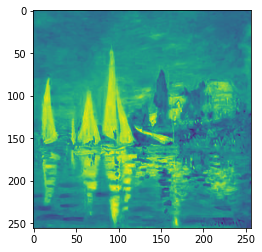

In [23]:
plt.imshow(train_img[:,:,0])

In [24]:
example_2 = test_path+'/photo_jpg/'+os.listdir(test_path+'/photo_jpg')[0]

In [25]:
#para_img = imread('/kaggle/input/gan-getting-started/photo_jpg/00068bc07f.jpg')
test_img = imread(example_2)

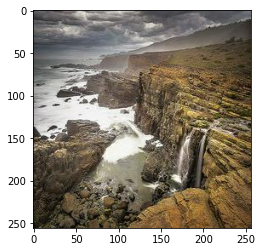

In [26]:
plt.imshow(test_img)

In [27]:
test_img.max()

255

In [28]:
test_img.min()

0

In [29]:
test_img.shape

(256, 256, 3)

In [30]:
dim1 = []
dim2 = []
for image_filename in os.listdir(train_path+'/monet_jpg'):
    
    img = imread(train_path+'/monet_jpg/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

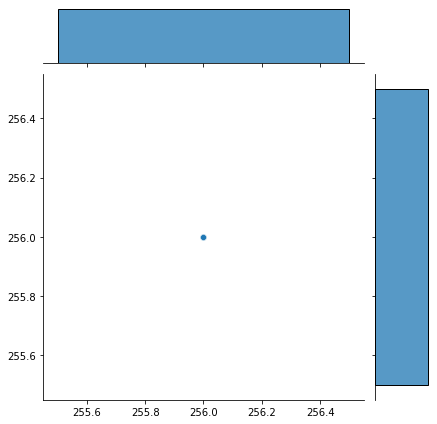

In [31]:
sns.jointplot(x = dim1, y = dim2)

In [32]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/photo_jpg'):
    
    img = imread(test_path+'/photo_jpg/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

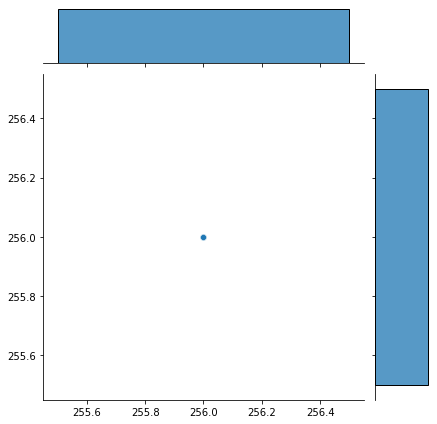

In [33]:
sns.jointplot(x = dim1, y = dim2)

Checking how many images we have per file

In [34]:
len(os.listdir(train_path+'/monet_jpg'))

300

In [35]:
len(os.listdir(test_path+'/photo_jpg'))

7038

# Image Manipulation #

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-10-11 10:57:36.498484: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
im_gen = ImageDataGenerator(rotation_range=45,
                           width_shift_range=0.10,
                           height_shift_range=0.10,
                           rescale=1/255,
                           shear_range=0.10,
                           zoom_range=0.10,
                           horizontal_flip=True,
                           fill_mode='nearest')

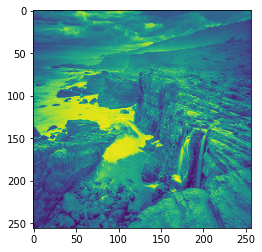

In [39]:
plt.imshow(test_img[:,:,0])

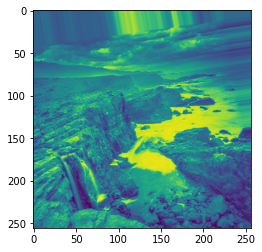

In [46]:
#plt.imshow(test_img)
plt.imshow(im_gen.random_transform(test_img[:,:,0].reshape([256,256,1])))

In [25]:
train_path

'./images/train'

In [26]:
im_gen.flow_from_directory(train_path)

Found 300 images belonging to 2 classes.


In [27]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

In [28]:
im_gen.flow_from_directory(train_path)

Found 300 images belonging to 2 classes.


In [29]:
im_gen.flow_from_directory(test_path)

Found 7038 images belonging to 2 classes.


# Creating GNA model #

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Reshape

In [ ]:
[2**i for i in range(0,20)]

[1,
 2,
 4,
 8,
 16,
 32,
 64,
 128,
 256,
 512,
 1024,
 2048,
 4096,
 8192,
 16384,
 32768,
 65536,
 131072,
 262144,
 524288]

In [45]:
generator = Sequential()

generator.add(Flatten(input_shape=[256,256,3]))
generator.add(Dense(32768,activation='relu'))
generator.add(Dense(8192,activation='relu'))
generator.add(Dense(32768,activation='sigmoid'))
generator.add(Reshape([256,256,3]))


: 

In [33]:
discriminator = Sequential()

discriminator.add(Flatten(input_shape=[256,256,3]))
discriminator.add(Dense(131072,activation='relu'))
discriminator.add(Dense(32768,activation='relu'))
discriminator.add(Dense(8192,activation='relu'))
discriminator.add(Dense(2048,activation='relu'))
discriminator.add(Dense(512,activation='relu'))
discriminator.add(Dense(128,activation='relu'))
discriminator.add(Dense(32,activation='relu'))
discriminator.add(Dense(1,activation="sigmoid"))

discriminator.compile(loss="binary_crossentropy", optimizer="adam")

: 

In [32]:
discriminator = Sequential()

discriminator.add(Flatten(input_shape=[256,256,1]))
discriminator.add(Dense(32768,activation='relu'))
discriminator.add(Dense(8192,activation='relu'))
discriminator.add(Dense(2048,activation='relu'))
discriminator.add(Dense(512,activation='relu'))
discriminator.add(Dense(128,activation='relu'))
discriminator.add(Dense(32,activation='relu'))
discriminator.add(Dense(1,activation="sigmoid"))

discriminator.compile(loss="binary_crossentropy", optimizer="adam")

In [45]:
train = image_dataset_from_directory(train_path, 
                                    validation_split=0.1,
                                    subset='training',
                                    seed=123,
                                    image_size=(256, 256),
                                    batch_size=32)

Found 300 files belonging to 2 classes.
Using 270 files for training.


In [49]:
train_image_gen = im_gen.flow_from_directory(train_path,
                                               target_size=(256,256),
                                                color_mode='rgb',
                                               batch_size=32,
                                            )

Found 300 images belonging to 2 classes.


In [54]:
len(train_image_gen[0])

2